In [1]:
import main
import pandas as pd
import numpy as np
from IPython.display import display, HTML
data = main.getData('data/wells_M_z_known.ipf')
print("well dataframe information")
display(data.info())
print("display first 10 rows of dataframe")
display(data.head(10))
print("display wells with more than 1 measurement point")
display(data.loc[[n for n in range(data.index[-1]+1) if data.loc[n].get_values().ndim > 1]])

well dataframe information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 663
Data columns (total 4 columns):
x     797 non-null float64
y     797 non-null float64
z1    797 non-null float64
z2    797 non-null float64
dtypes: float64(4)
memory usage: 31.1 KB


None

display first 10 rows of dataframe


,x,y,z1,z2
wid,,,,
0,705599,9297439,2.37500,-12.62500
0,705599,9297439,21.37500,-3.62500
0,705599,9297439,30.37500,-10.62500
0,705599,9297439,6.37500,-12.62500
1,709005,9297976,-14.01375,-105.01375
2,706584,9298388,-15.94625,-19.94625
3,706708,9298725,15.26187,-13.73813
4,706340,9298788,27.66519,7.66519
5,706402,9298788,-23.46481,-26.46481


display wells with more than 1 measurement point


,x,y,z1,z2
wid,,,,
0,705599,9297439,2.37500,-12.62500
0,705599,9297439,21.37500,-3.62500
0,705599,9297439,30.37500,-10.62500
0,705599,9297439,6.37500,-12.62500
19,705887,9300574,-20.31225,-23.31225
19,705887,9300574,-25.31225,-48.31225
30,698633,9304021,-32.95994,-54.95994
30,698633,9304021,2.04006,-62.95994
30,698633,9304021,-20.95994,-39.95994


<IPython.core.display.Javascript object>


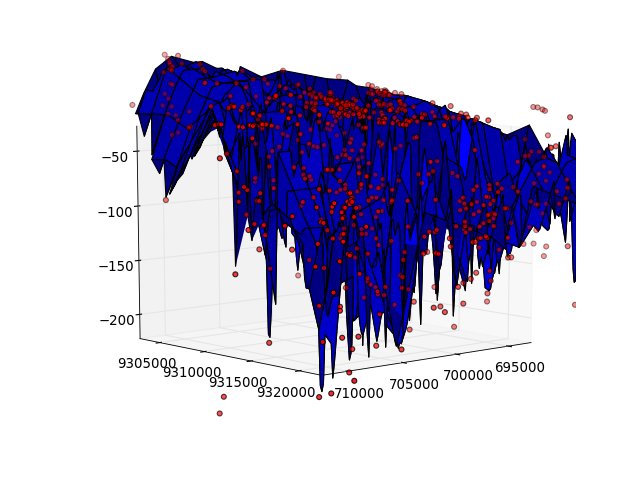

In [2]:
%matplotlib notebook
top = main.getLayers(data)
main.interpolasurface(top, 'linear')